In [12]:
import glob
import copy
import os
import cv2
import matplotlib.pyplot as plt
from IPython.display import Image

In [2]:
# imagesとlabelsリストの取得
data_dir = "C:/Users/yuuki/Kaggle/object_detection_try/shellfish/after_data/train"
image_paths = [os.path.join(data_dir, 'images', filename) for filename in os.listdir(os.path.join(data_dir, 'images')) if filename.endswith(".jpg")]
label_paths = [os.path.join(data_dir, 'labels', filename) for filename in os.listdir(os.path.join(data_dir, 'labels')) if filename.endswith(".txt")]

In [6]:
# 描画した画像の保存先
os.makedirs("./draw_dir", exist_ok=True)

In [7]:
# 描画した画像の保存先を変数に格納
dir = "./draw_dir/"

In [8]:
# 描画
for image_path, label_path in list(zip(image_paths, label_paths)):
    filename = os.path.basename(image_path)
    # 画像の読み込み
    img = cv2.imread(image_path)
    # bboxを描画したら画像が変わるためコピーをする
    img_draw = img.copy()
    # 高さと幅を取得
    h, w = img.shape[:2]
    # bboxの読み込み
    with open(label_path, "r") as f:
        bbox_list = f.readlines()

        for bbox in bbox_list:
            bb_cx, bb_cy, bb_w, bb_h = bbox.replace('\n', '').split(' ')[1:]
            bb_cx, bb_cy, bb_w, bb_h = float(bb_cx)*w, float(bb_cy)*h, float(bb_w)*w, float(bb_h)*h
            tlx, tly, brx, bry = int(bb_cx-bb_w/2), int(bb_cy-bb_h/2), int(bb_cx+bb_w/2), int(bb_cy+bb_h/2)
    
            # 四角を描画(左上, 右下)
            img_draw = cv2.rectangle(img_draw, (tlx, tly), (brx, bry), (0, 0, 255), thickness=2)
        # 画像の書き込み
        cv2.imwrite(os.path.join(dir, filename), img_draw)


AttributeError: 'NoneType' object has no attribute 'copy'

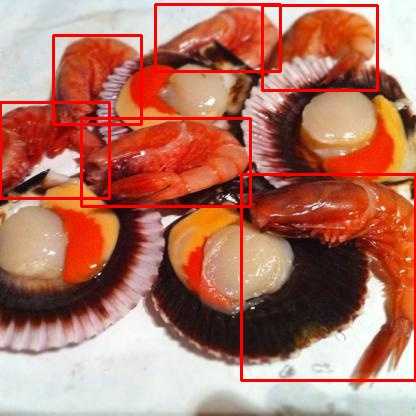

In [15]:
# 表示
Image("./draw_dir/img133.jpg")